Saved: 'test.png'
Time: 00:00.15 (Saving: 00:00.02)



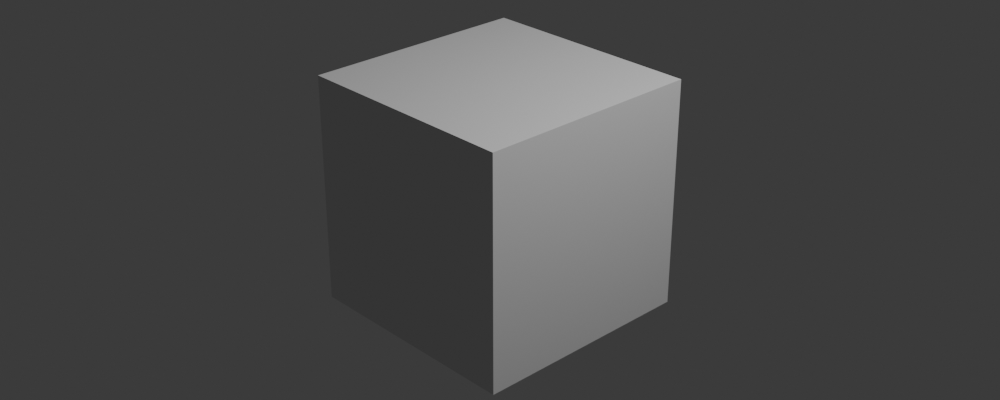

In [11]:
import bpy
from IPython.display import Image, display

import bpy

# Set the frame to 0 and insert the first keyframe
bpy.context.scene.frame_set(0)
cube = bpy.data.objects['Cube']
cube.rotation_euler = (0, 0, 0)
cube.keyframe_insert(data_path="rotation_euler", index=-1)

# Set the frame to 24 and insert the second keyframe with a 90-degree rotation
bpy.context.scene.frame_set(24)
cube.rotation_euler = (0, 0, 1.5708)  # 90 degrees in radians
cube.keyframe_insert(data_path="rotation_euler", index=-1)


# Render
path = "test.png"
bpy.context.scene.render.resolution_x = 1000
bpy.context.scene.render.resolution_y = 400
bpy.context.scene.render.image_settings.file_format = "PNG"
bpy.context.scene.render.filepath = path
bpy.ops.render.render(write_still=True)
bpy.data.images["Render Result"].save_render(filepath=bpy.context.scene.render.filepath)

display(Image(path))

In [12]:

import bpy
import os
from IPython.display import Image, display

# Set render resolution
bpy.context.scene.render.resolution_x = 1000
bpy.context.scene.render.resolution_y = 400
bpy.context.scene.render.image_settings.file_format = "PNG"

# Directory to save rendered frames
output_dir = "./frames"
os.makedirs(output_dir, exist_ok=True)

# Render each frame
for frame in range(25):
    bpy.context.scene.frame_set(frame)
    filepath = os.path.join(output_dir, f"frame_{frame:03d}.png")
    bpy.context.scene.render.filepath = filepath
    bpy.ops.render.render(write_still=True)

# Display the rendered frames
for frame in range(25):
    filepath = os.path.join(output_dir, f"frame_{frame:03d}.png")


Saved: 'frames/frame_000.png'
Time: 00:00.14 (Saving: 00:00.02)

Saved: 'frames/frame_001.png'
Time: 00:00.08 (Saving: 00:00.02)

Saved: 'frames/frame_002.png'
Time: 00:00.08 (Saving: 00:00.02)

Saved: 'frames/frame_003.png'
Time: 00:00.08 (Saving: 00:00.01)

Saved: 'frames/frame_004.png'
Time: 00:00.08 (Saving: 00:00.01)

Saved: 'frames/frame_005.png'
Time: 00:00.08 (Saving: 00:00.01)

Saved: 'frames/frame_006.png'
Time: 00:00.08 (Saving: 00:00.01)

Saved: 'frames/frame_007.png'
Time: 00:00.08 (Saving: 00:00.01)

Saved: 'frames/frame_008.png'
Time: 00:00.08 (Saving: 00:00.01)

Saved: 'frames/frame_009.png'
Time: 00:00.08 (Saving: 00:00.01)

Saved: 'frames/frame_010.png'
Time: 00:00.08 (Saving: 00:00.01)

Saved: 'frames/frame_011.png'
Time: 00:00.08 (Saving: 00:00.01)

Saved: 'frames/frame_012.png'
Time: 00:00.08 (Saving: 00:00.01)

Saved: 'frames/frame_013.png'
Time: 00:00.08 (Saving: 00:00.01)

Saved: 'frames/frame_014.png'
Time: 00:00.08 (Saving: 00:00.01)

Saved: 'frames/frame_015.

In [13]:
import sys
import os
import time

sys.path.append('/Library/Application Support/Blackmagic Design/DaVinci Resolve/Developer/Scripting/Modules')
import DaVinciResolveScript as dvr_script

# Initialize DaVinci Resolve
resolve = dvr_script.scriptapp("Resolve")

# Get the project manager and current project
projectManager = resolve.GetProjectManager()
currentProject = projectManager.GetCurrentProject()
media_pool = currentProject.GetMediaPool()

# Get the current timeline or create a new one if none exists
currentTimeline = currentProject.GetCurrentTimeline()
if currentTimeline is None:
    currentTimeline = media_pool.CreateEmptyTimeline("MyTimeline")

print(f"Current project: {currentProject.GetName()}")

# Paths to the directory with PNG frames
frames_directory = os.path.expanduser("~/Desktop/frames")

def import_and_append_media(file_path):
    if os.path.exists(file_path):
        # Import the media file into the project
        media_pool.ImportMedia([file_path])
        
        # Wait for the media pool to update
        time.sleep(0.01)

        # Get the imported clip
        mediaItems = media_pool.GetRootFolder().GetClipList()
        importedClip = None
        for clip in mediaItems:
            if clip.GetClipProperty("File Path") == file_path:
                importedClip = clip
                break

        if importedClip:
            # Append the imported clip to the timeline
            media_pool.AppendToTimeline([importedClip])
            print(f"The imported clip ({file_path}) has been added to the timeline.")
        else:
            print(f"The imported clip ({file_path}) was not found in the media pool.")
    else:
        print(f"The specified file ({file_path}) does not exist.")

# Import and append all PNG files in the directory
for frame_file in sorted(os.listdir(frames_directory)):
    if frame_file.endswith(".png"):
        frame_path = os.path.join(frames_directory, frame_file)
        import_and_append_media(frame_path)

Current project: hello1
The imported clip (/Users/jan-hendrik/Desktop/frames/frame_000.png) has been added to the timeline.
The imported clip (/Users/jan-hendrik/Desktop/frames/frame_001.png) has been added to the timeline.
The imported clip (/Users/jan-hendrik/Desktop/frames/frame_002.png) has been added to the timeline.
The imported clip (/Users/jan-hendrik/Desktop/frames/frame_003.png) has been added to the timeline.
The imported clip (/Users/jan-hendrik/Desktop/frames/frame_004.png) has been added to the timeline.
The imported clip (/Users/jan-hendrik/Desktop/frames/frame_005.png) has been added to the timeline.
The imported clip (/Users/jan-hendrik/Desktop/frames/frame_006.png) has been added to the timeline.
The imported clip (/Users/jan-hendrik/Desktop/frames/frame_007.png) has been added to the timeline.
The imported clip (/Users/jan-hendrik/Desktop/frames/frame_008.png) has been added to the timeline.
The imported clip (/Users/jan-hendrik/Desktop/frames/frame_009.png) has been